# Keras

Keras es una biblioteca para manipular redes neuronales. Es una capa de alto nivel por arriba de Theano (o de TensorFlow).

## Ejemplo simple

Construcción de una red neuronal:

In [26]:
%matplotlib inline
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Dense(output_dim=2, input_dim=5, activation="sigmoid"))
model.add(Dense(output_dim=1, activation="sigmoid"))

Podemos ver una descripción del modelo:

In [27]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 2)             12          dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             3           dense_1[0][0]                    
Total params: 15
____________________________________________________________________________________________________


Así como también podemos visualizarlo:

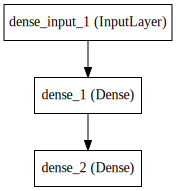

In [28]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Luego hay que compilar:

In [29]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Usamos un conjunto de datos de ejemplo:

In [30]:
import numpy as np

def dataset(n_train, n_test):
    n = n_train + n_test
    points = np.random.uniform(-3, 3, [n, 2])
    features = np.c_[points, points[:, 0]**2, points[:, 1]**2, points[:, 0] * points[:, 1]]
    labels = (np.linalg.norm(points, axis=1) > 2).astype(int)
    return (features[:n_train], labels[:n_train]), (features[n_train:], labels[n_train:])

(X_train, y_train), (X_test, y_test) = dataset(8000, 2000)

Entrenamos la red:

In [31]:
model.fit(X_train, y_train, nb_epoch=50, batch_size=32)

Epoch 1/50
8000/8000 [==============================] - 0s - loss: 0.7362 - acc: 0.4261     
Epoch 2/50
8000/8000 [==============================] - 0s - loss: 0.6680 - acc: 0.5556     
Epoch 3/50
8000/8000 [==============================] - 0s - loss: 0.6313 - acc: 0.6415     
Epoch 4/50
8000/8000 [==============================] - 0s - loss: 0.6026 - acc: 0.6461     
Epoch 5/50
8000/8000 [==============================] - 0s - loss: 0.5858 - acc: 0.6461     
Epoch 6/50
8000/8000 [==============================] - 0s - loss: 0.5725 - acc: 0.6461     
Epoch 7/50
8000/8000 [==============================] - 0s - loss: 0.5593 - acc: 0.6461     
Epoch 8/50
8000/8000 [==============================] - 0s - loss: 0.5454 - acc: 0.6461     
Epoch 9/50
8000/8000 [==============================] - 0s - loss: 0.5304 - acc: 0.6616     
Epoch 10/50
8000/8000 [==============================] - 0s - loss: 0.5143 - acc: 0.7059     
Epoch 11/50
8000/8000 [==============================] - 0s - loss: 0

Podemos evaluar y ver métricas:

In [32]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print()
print()
print('Valor de la función de costo:', loss_and_metrics[0])
print('Acierto:', loss_and_metrics[1])

1696/2000 [========================>.....] - ETA: 0s

Valor de la función de costo: 0.111558535993
Acierto: 0.983


Y también podemos ver las clases predecidas y sus probablidades:

In [33]:
y_pred = model.predict_classes(X_test)
probability = model.predict_proba(X_test)

print(y_pred)
print(probability)

  32/2000 [..............................] - ETA: 0s[[1]
 [0]
 [1]
 ..., 
 [0]
 [1]
 [1]]
[[ 0.90671945]
 [ 0.0555241 ]
 [ 0.98214972]
 ..., 
 [ 0.11941245]
 [ 0.97730196]
 [ 0.90484691]]


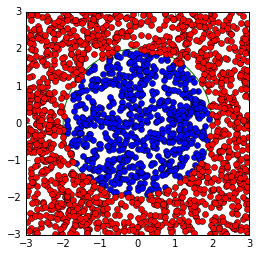

In [34]:
import matplotlib.pyplot as plt

def plot(inside, outside):
    if inside.any():
        plt.plot(inside[:, 0], inside[:, 1], 'bo')
    if outside.any():
        plt.plot(outside[:, 0], outside[:, 1], 'ro')
    circle = plt.Circle((0, 0), radius=2, color='g', fill=False)
    ax = plt.gca()
    ax.set_aspect(1)
    ax.add_patch(circle)
    plt.show()

points_test = X_test[:, :2]

inside = np.array([x for x, y in zip(points_test, y_pred) if y == 0])
outside = np.array([x for x, y in zip(points_test, y_pred) if y == 1])

plot(inside, outside)

## Funciones de costo disponibles

* mean_squared_error
* mean_absolute_error
* mean_absolute_percentage_error
* mean_squared_logarithmic_error
* squared_hinge
* hinge
* binary_crossentropy
* categorical_crossentropy
* sparse_categorical_crossentropy
* kullback_leibler_divergence
* poisson
* cosine_proximity

## Optimizadores disponibles

* SGD
* RMSprop
* Adagrad
* Adadelta
* Adam
* Adamax
* Nadam

También se puede instanciar "manualmente" el optimizador para ajustar parámetros como la constante de aprendizaje, el momento y la desaceleración de la constante de aprendizaje:

In [35]:
from keras.optimizers import SGD

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, decay=0.001), metrics=['accuracy'])

## Funciones de activación disponibles

* softmax
* softplus
* softsign
* relu
* tanh
* sigmoid
* hard_sigmoid
* linear

## Compatibilidad con scikit-learn

Keras provee una API para usar los modelos como si fueran parte de scikit-learn:

In [36]:
from keras.wrappers import scikit_learn
from sklearn import cross_validation

classifier = scikit_learn.KerasClassifier(build_fn=lambda: model, nb_epoch=5)
# build_fn debe devolver un modelo compilado.

classifier.fit(X_train, y_train)

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=3, shuffle=True)
results = cross_validation.cross_val_score(classifier, X_train, y_train, cv=kfold)
print()
print()
print('Acierto:', results.mean())

Epoch 1/5
8000/8000 [==============================] - 0s - loss: 0.1041 - acc: 0.9882     
Epoch 2/5
8000/8000 [==============================] - 0s - loss: 0.0892 - acc: 0.9924     
Epoch 3/5
8000/8000 [==============================] - 0s - loss: 0.0808 - acc: 0.9923     
Epoch 4/5
8000/8000 [==============================] - 0s - loss: 0.0752 - acc: 0.9923     
Epoch 5/5
8000/8000 [==============================] - 0s - loss: 0.0709 - acc: 0.9946     
Epoch 1/5
5333/5333 [==============================] - 0s - loss: 0.0679 - acc: 0.9944     
Epoch 2/5
5333/5333 [==============================] - 0s - loss: 0.0663 - acc: 0.9946     
Epoch 3/5
5333/5333 [==============================] - 0s - loss: 0.0647 - acc: 0.9949     
Epoch 4/5
5333/5333 [==============================] - 0s - loss: 0.0632 - acc: 0.9936     
Epoch 5/5
5333/5333 [==============================] - 0s - loss: 0.0605 - acc: 0.9953     
Epoch 2/5
5333/5333 [==============================] - 0s - loss: 0.0594 - acc: 

También está disponible la clase `KerasRegressor`. Con esto se pueden hacer cosas como usar `GridSearchCV` para buscar la combinación de parámetros que mejoran los resultados (valores de la constante de aprendizaje, momento, etc), así como también construir un pipeline en donde el modelo puede tomar datos a partir de otros modelos de scikit-learn.

## Ejemplo de análisis de sentimientos de comentarios de IMDb

Este es un ejemplo que aprovecha a mostrar más funcionalidades.

Se comienza estableciendo algunos parámetros:

In [37]:
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import Convolution1D, MaxPooling1D
from keras.datasets import imdb


# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
filter_length = 5
nb_filter = 64
pool_length = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
nb_epoch = 2

Se cargan los datos:

In [38]:
print('Cargando datos...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'ejemplos de entrenamiento')
print(len(X_test), 'ejemplos de evaluación')

Cargando datos...
20000 ejemplos de entrenamiento
5000 ejemplos de evaluación


Veamos dos de los ejemplos:

In [39]:
print(X_train[1])
print()
print(X_train[16])

[1, 621, 6, 135, 101, 84, 392, 27, 20, 133, 1522, 63, 6401, 6843, 896, 11, 213, 149, 9, 417, 180, 1748, 32, 63, 31, 525, 7, 78, 42, 147, 66, 644, 113, 89, 8, 21, 147, 89, 13, 1851, 3994, 43, 170, 6, 60, 21, 296, 35, 1310, 214, 6, 789, 7146, 7, 15, 16, 12, 14, 15, 16, 12, 14, 5, 927, 10, 5, 6843, 13, 62, 23, 652, 25, 2046, 927, 7, 73, 574, 49, 5, 6843, 1264, 56, 135, 46, 38, 6, 5, 191, 342, 10, 14274, 10, 6843, 16849, 2572, 13, 627, 7, 412, 18, 361, 6, 20, 11393, 342, 17222, 45, 241, 382, 5, 28, 7, 15, 16, 12, 14, 15, 16, 12, 14, 5, 132, 18, 5, 28, 24, 3773, 209, 6, 2380, 61, 6, 2082, 146, 10885, 6, 2962, 146, 1003, 6, 523, 146, 910, 6, 99, 7, 19, 165, 266, 53, 23, 460, 6, 29, 33, 199, 190, 11, 41, 286, 8436, 11, 186, 17, 7, 5, 78, 1522, 24, 89, 33, 4317, 17, 551, 1851, 3994, 43, 37, 240, 40, 635, 9, 189, 331, 4183, 45, 5, 2, 6, 102, 37, 24, 5, 137, 18, 5, 757, 7, 15, 16, 12, 14, 15, 16, 12, 14, 25, 26, 212, 63, 20, 30, 13, 36, 11, 41, 635, 636, 7, 53, 230, 35, 212, 43, 46, 199, 6843, 2

Cada ejemplo es una secuencia de índices. Se transforman a vectores de largo fijo, rellenando con ceros:

In [40]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('Tamaño de X_train:', X_train.shape)
print('Tamaño de X_test:', X_test.shape)

Tamaño de X_train: (20000, 100)
Tamaño de X_test: (5000, 100)


Los mismos dos ejemlpos ahora:

In [41]:
print(X_train[1])
print()
print(X_train[16])

[  24   89   33 4317   17  551 1851 3994   43   37  240   40  635    9  189
  331 4183   45    5    2    6  102   37   24    5  137   18    5  757    7
   15   16   12   14   15   16   12   14   25   26  212   63   20   30   13
   36   11   41  635  636    7   53  230   35  212   43   46  199 6843   26
 2539   61 1401    7    5  453 4693  231  112   40   93 4232   27    9 5926
    2   56  127    7   78  124   20   30   18    9 3245  617 2806    6  911
   19   66   82   64  681 4058   11    5 1324    7]

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     1    19   101   186
    17     9   243  3850     7   295    17    23    57   102    19   158
   131   129     9  9201   328    32  3071  4423    43    31     6    29
    19    57   107    35    94   100    17    52     9   192    10    97
    95   101     7     5  1969    13    80   103   17

Ahora construimos un modelo:

In [42]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_length=pool_length))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Visualización

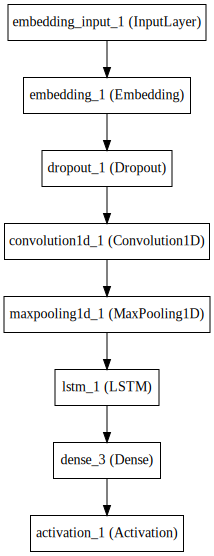

In [44]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Lo entrenamos y evaluamos:

In [43]:
print('Entrenando...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Valor de la función de costo:', score)
print('Acierto:', acc)

Entrenando...
Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 143s - loss: 0.4298 - acc: 0.7888 - val_loss: 0.3346 - val_acc: 0.8492
Epoch 2/2
5000/5000 [==============================] - 9s     
Valor de la función de costo: 0.338069551766
Acierto: 0.850399994493


Desafortunadamente los datos de este ejemplo tienen solamente los índices de las palabras, así que no podemos probar el modelo con texto.

## Capas disponibles

Hay muchas capas disponibles. Se destacan:

* `Dense`
* `Activation`
* `Merge`: permite combinar varias capas ya sea concatenándolas, sumándolas, etc.
* `Reshape`
* `Permute`
* `RepeatVector`
* Convolutivas (incluídas las de Pooling)
* Recurrentes (incluyendo `LSTM`)
* `Embedding`: permite representar con vectores de dimensión fija a números naturales de un rango dado (índices). Los pesos que se entrenan en esta capa son las entradas de la matriz que hace corresponder vectores a índices (que oficia de tabla de look-up).
* `BatchNormalization`: para dejar la norma de los vectores cercana a 0 y con desviación estándar cercana a 1.
* Aquellas que agregan ruido con el objetivo de no sobreajustar:
    * `Dropout`: Inhibe aleatoria una fracción `p` de las entradas.
    * `GaussianNoise`: Agrega un ruido gaussiano a la entrada.

TODO: ejemplo de Diego

## Functional API

Para tener más flexibilidad a la hora de construir una red neuronal que con `Sequential`, se puede usar esta parte de la biblioteca. Se pueden hacer cosas como:

* Tener varias capas de salida.
* Modelar una arquitectura de grafo dirigido acíclico.
* Modelos que compartan capas.

Un ejemplo simple:

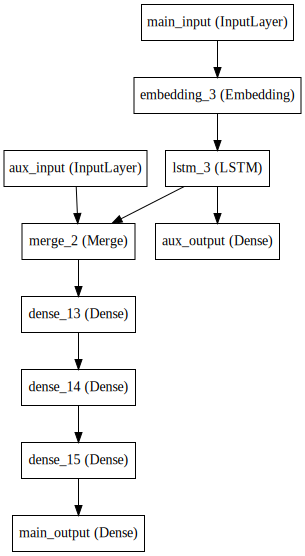

In [48]:
from keras.layers import Input, Embedding, LSTM, Dense, merge
from keras.models import Model

main_input = Input(shape=(100,), dtype='int32', name='main_input')

x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

lstm_out = LSTM(32)(x)

auxiliary_loss = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(5,), name='aux_input')
x = merge([lstm_out, auxiliary_input], mode='concat')

x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_loss = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(input=[main_input, auxiliary_input], output=[main_loss, auxiliary_loss])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Callbacks

Permiten realizar acciones luego de ciertos eventos como al terminar de entrenar un batch o un epoch. Casos de usos de ejemplo:

* Mostrar una barra de progreso mientras se entrena.
* Guardar un histórico de medidas.
* Definir un criterio de parada personalizado. Por ejemplo, dejar de entrenar el modelo si no mejora luego de cierta cantidad de iteraciones.
* Persistir el modelo cada cierto tiempo, por si se corta la energía.
* Monitorear remotamente el avance de un entrenamiento.

## Hay más

Hay más cosas que se vieron poco acá pero que vale la pena mencionar que existen:

* Usar TensorFlow en lugar de Theano como backend.
* Poder controlar más el entrenamiento. Por ejemplo para el caso que se precisen manejar datos que no entren en memoria.
* Cambiar los valores de inicialización de los pesos, con varias distribuciones de probabilidad para asignación aleatoria de valores de los pesos ya disponibles.
* **Regulzarizadores**: permiten penalizar la función de costo si los pesos cumplen determinadas condiciones. Para combatir el sobreajuste.
* **Restricciones**: se pueden poner restricciones en los pesos, como por ejemplo que su norma sea menor a un número dado o que sean no negativos.
* Aceleración de cálculos utiilizando la GPU.

## Referencias

* [Documentación de Keras](https://keras.io/)
* [Ejemplos del repositorio de Keras](https://github.com/fchollet/keras/tree/master/examples)